In [1]:
import pandas as pd
import os

In [5]:
scoring = pd.read_pickle(os.path.join("","HockeyDatabank","scoring_mi.pickle"))
birthdates = pd.read_pickle(os.path.join("","HockeyDatabank","birthdates.pickle"))

In [6]:
scoring.head()

firstName lastName pos tmID    GP    G     A   Pts    SOG
playerID  year                                                          
aaltoan01 1997     Antti    Aalto   C  ANA   3.0  0.0   0.0   0.0    1.0
          1998     Antti    Aalto   C  ANA  73.0  3.0   5.0   8.0   61.0
          1999     Antti    Aalto   C  ANA  63.0  7.0  11.0  18.0  102.0
          2000     Antti    Aalto   C  ANA  12.0  1.0   1.0   2.0   18.0
abbotsp01 2013   Spencer   Abbott   L  TOR   1.0  0.0   0.0   0.0    2.0

In [7]:
birthdates.head()

birthDate
1975-03-04    aaltoan01
1988-04-30    abbotsp01
1987-02-25    abdelju01
1993-09-23    abergpo01
1980-03-24     abidra01
Name: playerID, dtype: object

In [9]:
wayne = scoring.loc['gretzwa01']
wayne

firstName lastName pos tmID    GP     G      A    Pts    SOG
year                                                             
1980     Wayne  Gretzky   C  EDM  80.0  55.0  109.0  164.0  261.0
1981     Wayne  Gretzky   C  EDM  80.0  92.0  120.0  212.0  369.0
1982     Wayne  Gretzky   C  EDM  80.0  71.0  125.0  196.0  348.0
1983     Wayne  Gretzky   C  EDM  74.0  87.0  118.0  205.0  324.0
1984     Wayne  Gretzky   C  EDM  80.0  73.0  135.0  208.0  358.0
1985     Wayne  Gretzky   C  EDM  80.0  52.0  163.0  215.0  350.0
1986     Wayne  Gretzky   C  EDM  79.0  62.0  121.0  183.0  288.0
1987     Wayne  Gretzky   C  EDM  64.0  40.0  109.0  149.0  211.0
1988     Wayne  Gretzky   C  LAK  78.0  54.0  114.0  168.0  303.0
1989     Wayne  Gretzky   C  LAK  73.0  40.0  102.0  142.0  236.0
1990     Wayne  Gretzky   C  LAK  78.0  41.0  122.0  163.0  212.0
1991     Wayne  Gretzky   C  LAK  74.0  31.0   90.0  121.0  215.0
1992     Wayne  Gretzky   C  LAK  45.0  16.0   49.0   65.0  141.0
1993     Wayne  Gretzky   C  LAK  81.0  38.0   92.0  130.0  233.0
1994     Wayne  Gretzky   C  LAK  48.0  11.0   37.0   48.0  142.0
1995     Wayne  Gretzky   C  LAK  62.0  15.0   66.0   81.0  144.0
1995     Wayne  Gretzky   C  STL  18.0   8.0   13.0   21.0   51.0
1996     Wayne  Gretzky   C  NYR  82.0  25.0   72.0   97.0  286.0
1997     Wayne  Gretzky   C  NYR  82.0  23.0   67.0   90.0  201.0
1998     Wayne  Gretzky   C  NYR  70.0   9.0   53.0   62.0  132.0

In [10]:
sums = wayne.groupby(level=0)['G','A'].sum()
sums

G      A
year             
1980  55.0  109.0
1981  92.0  120.0
1982  71.0  125.0
1983  87.0  118.0
1984  73.0  135.0
1985  52.0  163.0
1986  62.0  121.0
1987  40.0  109.0
1988  54.0  114.0
1989  40.0  102.0
1990  41.0  122.0
1991  31.0   90.0
1992  16.0   49.0
1993  38.0   92.0
1994  11.0   37.0
1995  23.0   79.0
1996  25.0   72.0
1997  23.0   67.0
1998   9.0   53.0

In [12]:
means = sums.rolling(3)['G'].mean()
means.head(10)

year
1980          NaN
1981          NaN
1982    72.666667
1983    83.333333
1984    77.000000
1985    70.666667
1986    62.333333
1987    51.333333
1988    52.000000
1989    44.666667
Name: G, dtype: float64

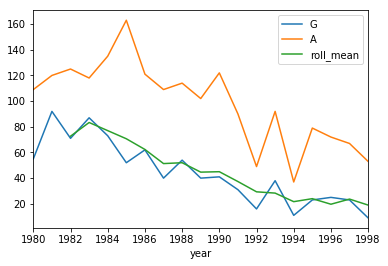

In [13]:
%matplotlib inline
sums.assign(roll_mean = means).plot()

In [14]:
means = sums.rolling(3, min_periods=2)['G'].mean()
means.head(10)

year
1980          NaN
1981    73.500000
1982    72.666667
1983    83.333333
1984    77.000000
1985    70.666667
1986    62.333333
1987    51.333333
1988    52.000000
1989    44.666667
Name: G, dtype: float64

In [15]:
means = sums.rolling(3).mean()
means.head()

G      A
year                  
1980        NaN    NaN
1981        NaN    NaN
1982  72.666667  118.0
1983  83.333333  121.0
1984  77.000000  126.0

In [16]:
means = sums.rolling(3, center= True).mean()
means.head()

G           A
year                       
1980        NaN         NaN
1981  72.666667  118.000000
1982  83.333333  121.000000
1983  77.000000  126.000000
1984  70.666667  138.666667

In [17]:
triang_sum = sums['G'].rolling(3, win_type='triang', center = True).sum()
sums.assign(trinag = triang_sum).head()

G      A  trinag
year                     
1980  55.0  109.0     NaN
1981  92.0  120.0   155.0
1982  71.0  125.0   160.5
1983  87.0  118.0   159.0
1984  73.0  135.0   142.5

In [19]:
quarter = birthdates.resample('Q').count()
quarter.rolling(4).sum().head(10)

birthDate
1940-03-31    NaN
1940-06-30    NaN
1940-09-30    NaN
1940-12-31    3.0
1941-03-31    1.0
1941-06-30    1.0
1941-09-30    1.0
1941-12-31    0.0
1942-03-31    1.0
1942-06-30    1.0
Freq: Q-DEC, Name: playerID, dtype: float64

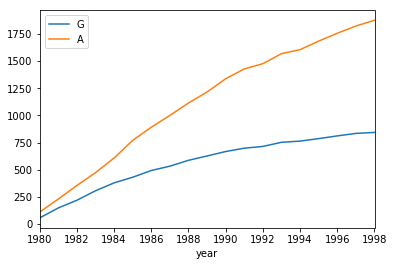

In [20]:
sums.expanding().sum().plot();

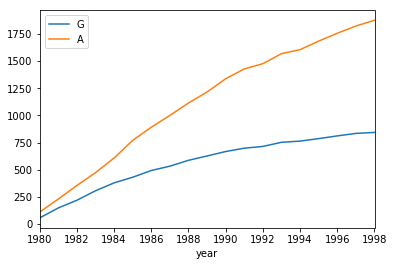

In [21]:
sums.cumsum().plot();